In [39]:
import os
import sys
sys.path.insert(0,'../')
import morpho
import matplotlib.pyplot as plt
import scanpy
import numpy as np
import math
from jupyterthemes import jtplot
jtplot.style(theme="oceans16")
sys.path.insert(0,'../data/cellbin_h5ad/')
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import importlib
importlib.reload(morpho)
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
files = []
data_dir='../data/cellbin_h5ad'
for i in range(5,30):
    if i < 10:
        files.append('E8-10_b_S0'+str(i)+'.h5ad')
    else:  
        files.append('E8-10_b_S'+str(i)+'.h5ad')



In [3]:
slices = [scanpy.read_h5ad(os.path.join(data_dir, slice_file)) for slice_file in files]

In [44]:
basn_slices = morpho.morpho_align(
    models=[s.copy() for s in slices],
    spatial_key="spatial",
    key_added="align_spatial",
    mode="SN",
    select_high_exp_genes=False,
    normalize_c=True,
    normalize_g=True,
    max_iter=100,
    device="cpu",
    lambdaVF = 10,
    beta = 0.01
)

|-----> [Models alignment based on morpho] in progress: 4.1667%|-----> Filtered all samples for common genes. There are 5266 common genes.
|-----> [Models alignment based on morpho] in progress: 8.3333%|-----> Filtered all samples for common genes. There are 7127 common genes.
|-----> [Models alignment based on morpho] in progress: 12.5000%|-----> Filtered all samples for common genes. There are 7510 common genes.
|-----> [Models alignment based on morpho] in progress: 16.6667%|-----> Filtered all samples for common genes. There are 7776 common genes.
|-----> [Models alignment based on morpho] in progress: 20.8333%|-----> Filtered all samples for common genes. There are 8334 common genes.
|-----> [Models alignment based on morpho] in progress: 25.0000%|-----> Filtered all samples for common genes. There are 8257 common genes.
|-----> [Models alignment based on morpho] in progress: 29.1667%|-----> Filtered all samples for common genes. There are 8251 common genes.
|-----> [Models alignm

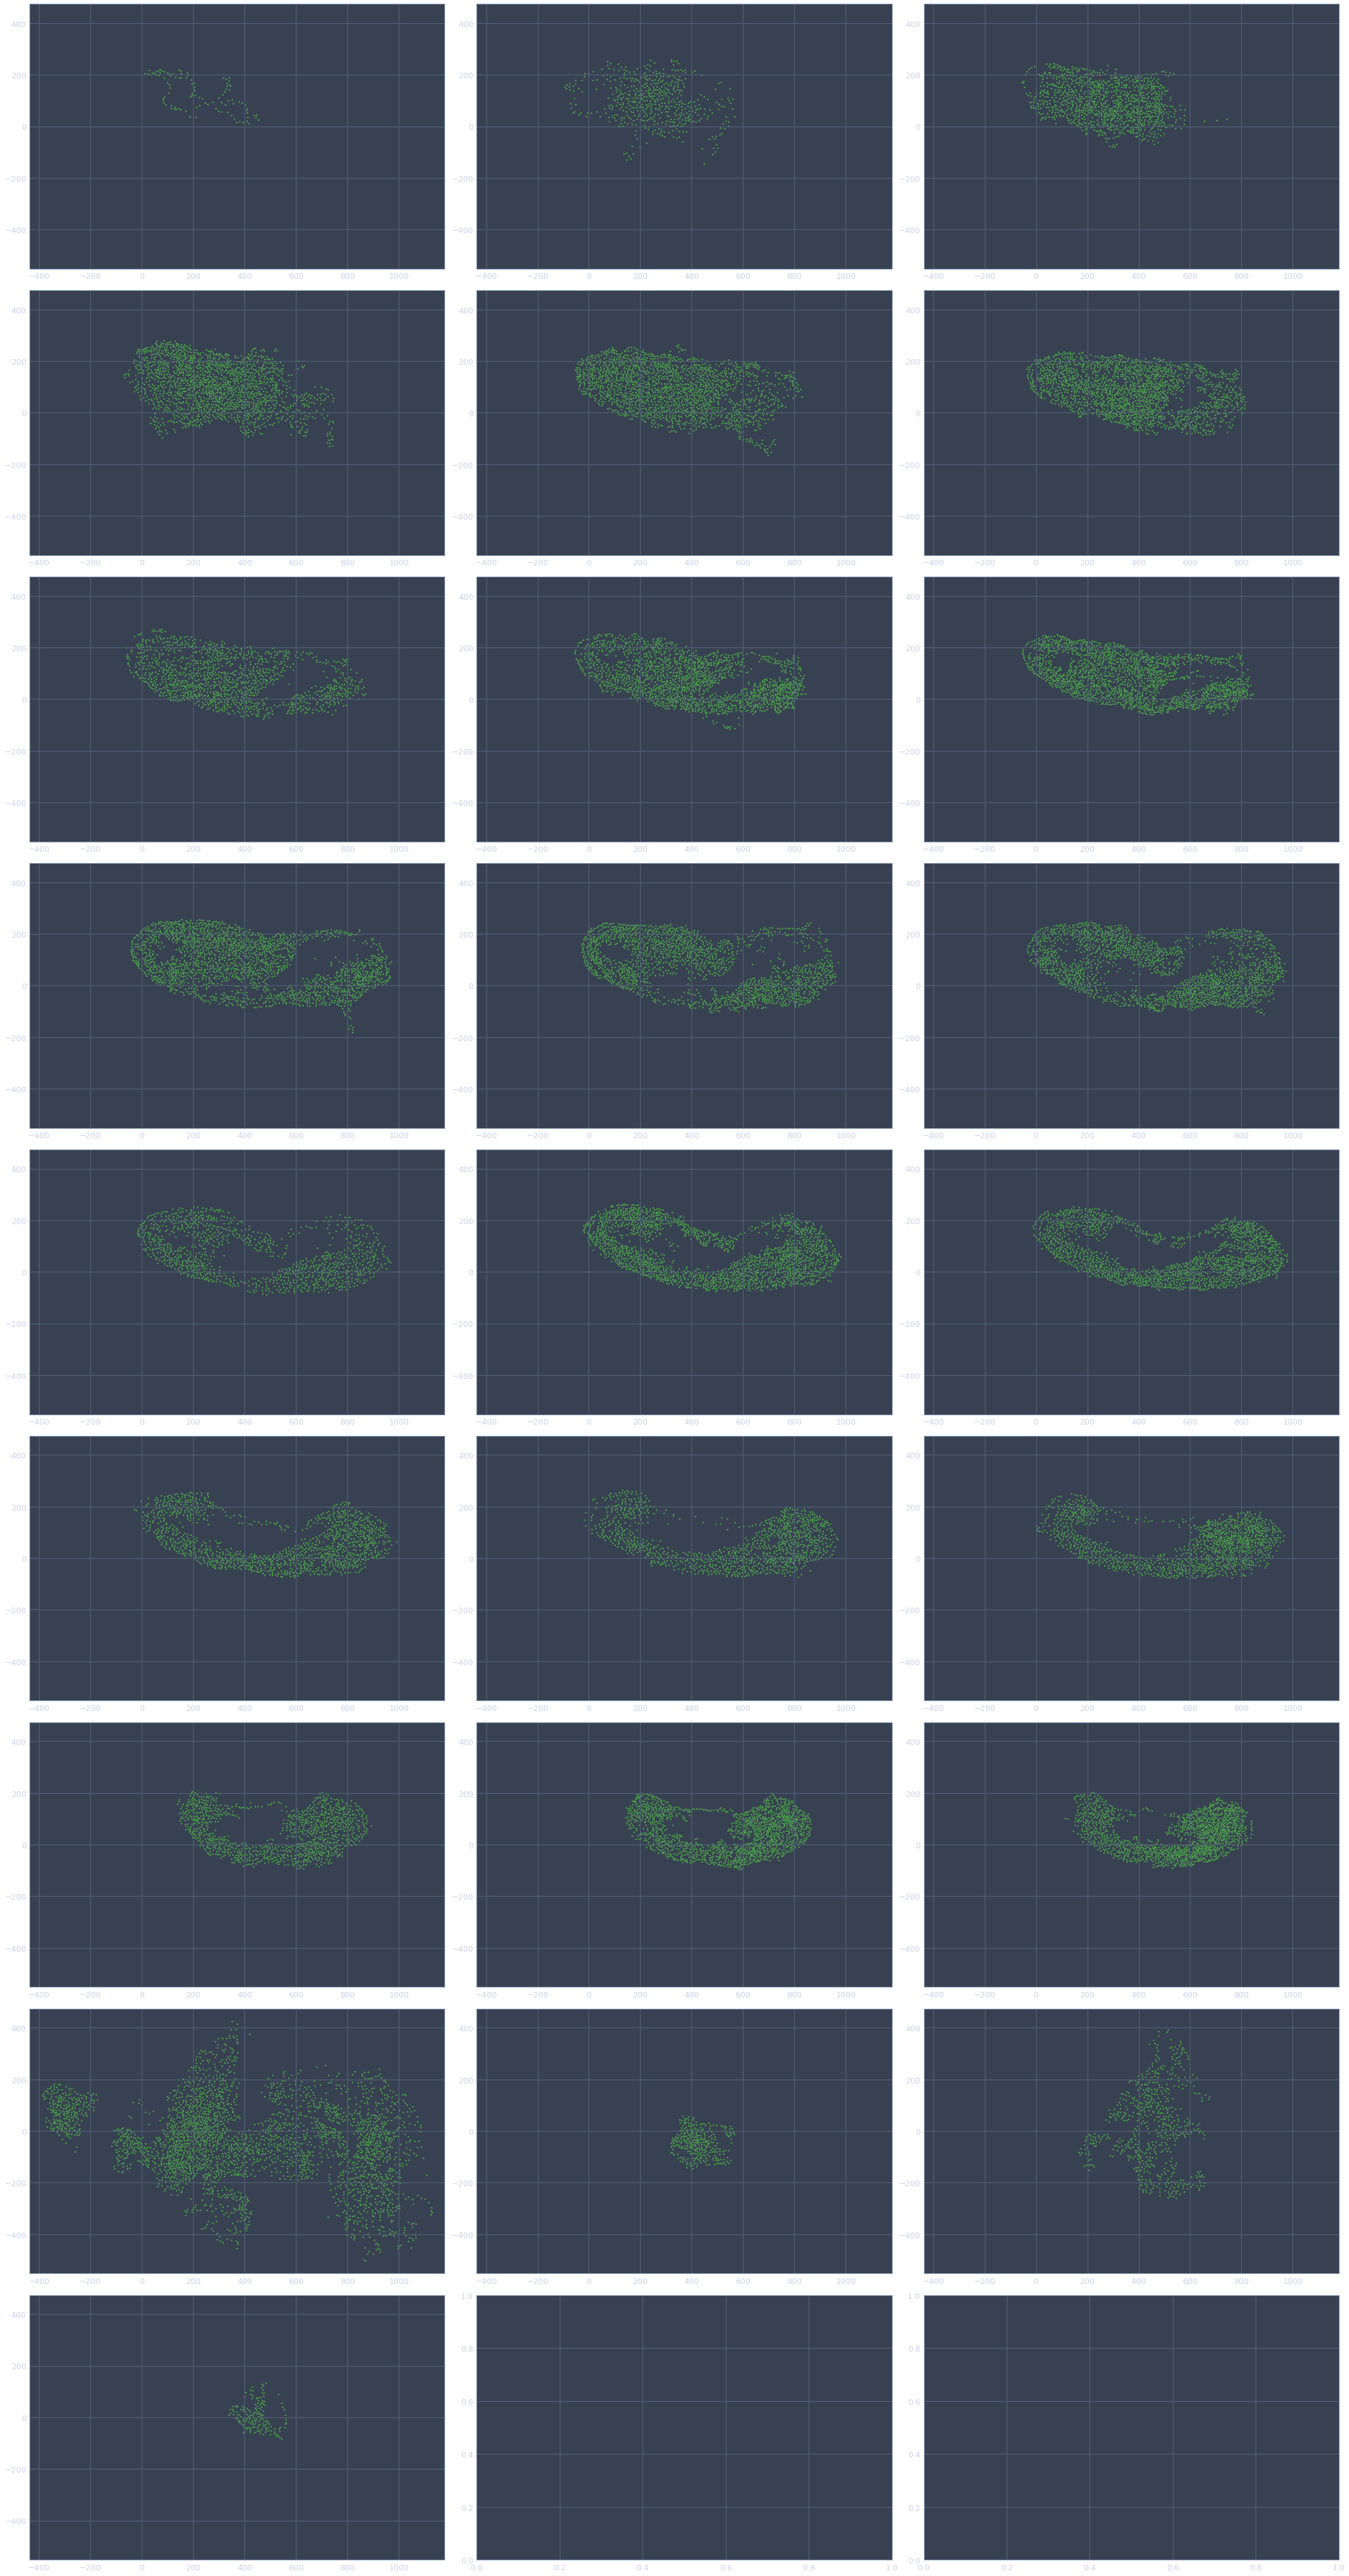

In [33]:
slice_colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3']
xmin,xmax = -100,800
ymin,ymax = -100,300
%matplotlib inline
lines = math.ceil((len(basn_slices)) / 3)
xmin = np.min([np.min(basn_slices[index].obsm['align_spatial'][:,0]) for index in range(len(basn_slices))])
xmax = np.max([np.max(basn_slices[index].obsm['align_spatial'][:,0]) for index in range(len(basn_slices))])
ymin = np.min([np.min(basn_slices[index].obsm['align_spatial'][:,1]) for index in range(len(basn_slices))])
ymax = np.max([np.max(basn_slices[index].obsm['align_spatial'][:,1]) for index in range(len(basn_slices))])
margin = 50
scale=(ymax-ymin+2*margin)/(xmax-xmin+2*margin)

fig, axs = plt.subplots(lines, 3,figsize=(30,lines*10*scale))
for index in range(len(basn_slices)):
    line = index//3
    col = index - line*3
    axs[line,col].scatter(basn_slices[index].obsm['align_spatial'][:,0],basn_slices[index].obsm['align_spatial'][:,1],s=5,c=slice_colors[2])
    axs[line,col].set_xlim([xmin-margin,xmax+margin])
    axs[line,col].set_ylim([ymin-margin,ymax+margin])
    # axs[line,col].axis('equal')
plt.tight_layout()
plt.show()

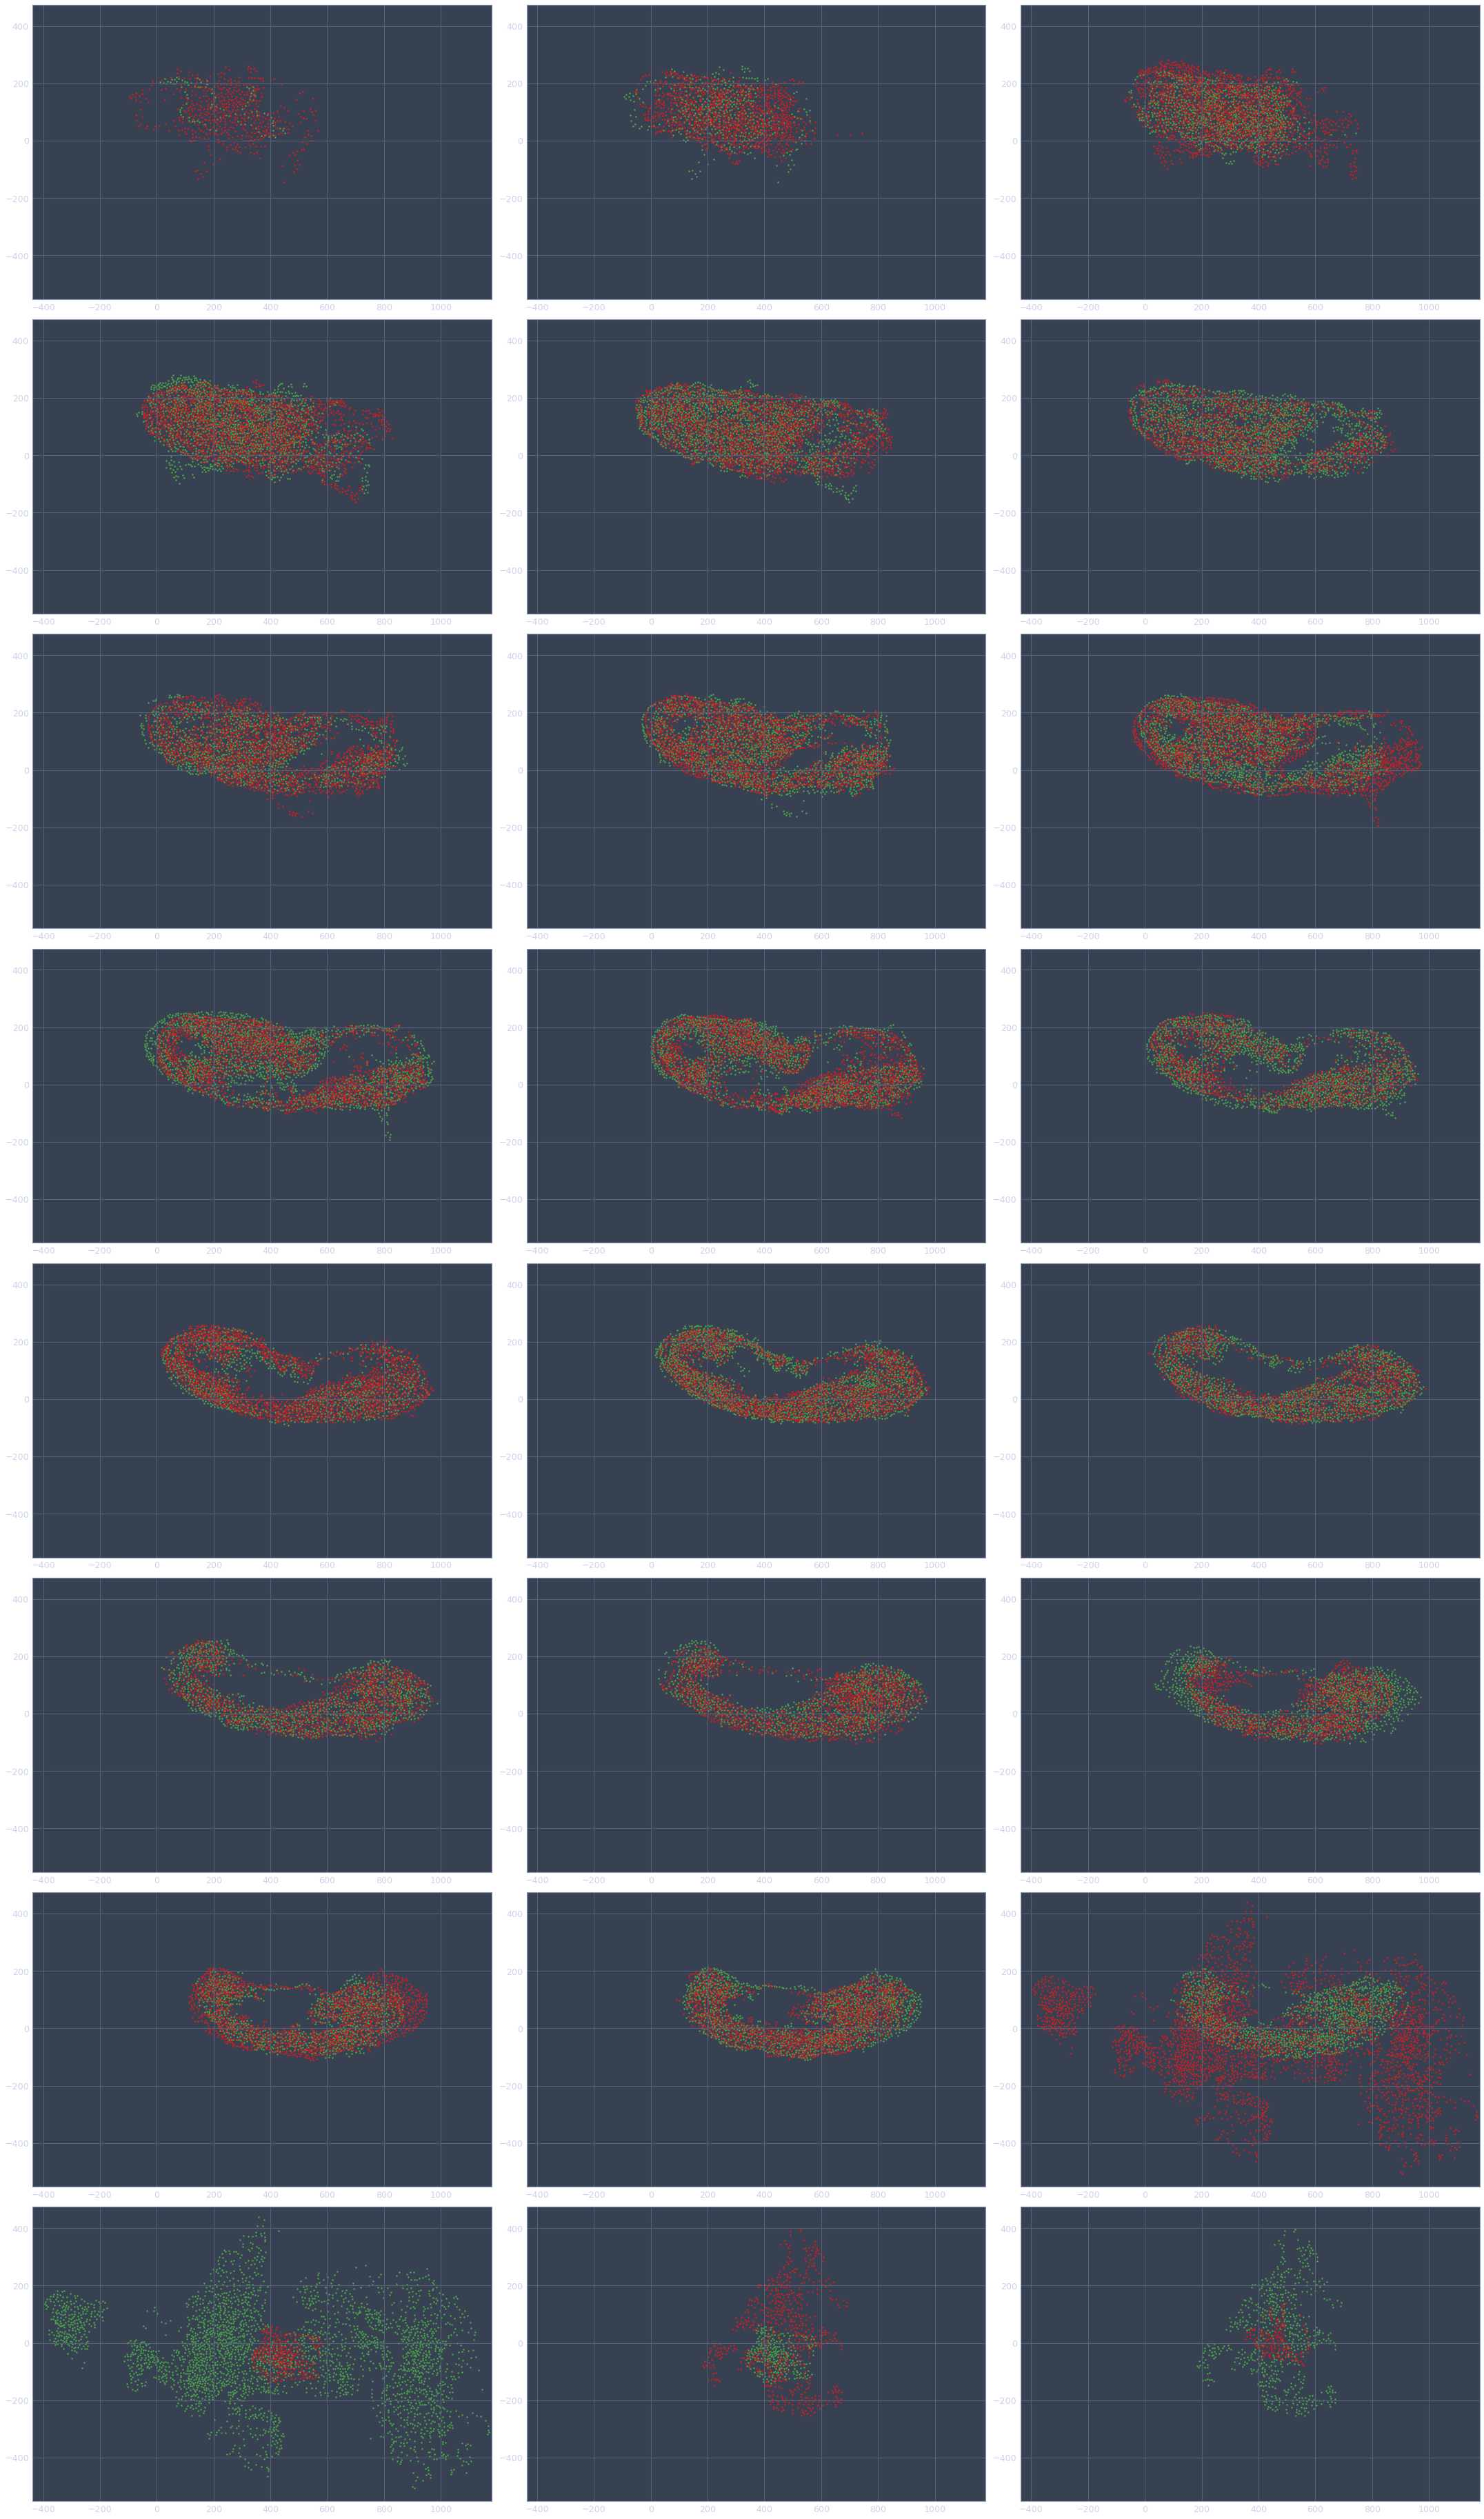

In [43]:
%matplotlib inline
lines = math.ceil((len(basn_slices)-1) / 3)
fig, axs = plt.subplots(lines, 3,figsize=(30,lines*10*scale))
for index in range(len(basn_slices)-1):
    line = index // 3
    col = index - line*3
    axs[line,col].scatter(basn_slices[index].obsm['align_spatial'][:,0],basn_slices[index].obsm['align_spatial'][:,1],s=5,c=slice_colors[2])
    axs[line,col].scatter(basn_slices[index+1].obsm['align_spatial'][:,0],basn_slices[index+1].obsm['align_spatial'][:,1],s=5,c=slice_colors[0])
    axs[line,col].set_xlim([xmin-margin,xmax+margin])
    axs[line,col].set_ylim([ymin-margin,ymax+margin])
plt.tight_layout()
plt.show()

In [11]:
bas_slices = morpho.morpho_align(
    models=[s.copy() for s in slices],
    spatial_key="spatial",
    key_added="align_spatial",
    mode="S",
    select_high_exp_genes=False,
    normalize_c=True,
    normalize_g=True,
    max_iter=100,
    device="cpu",
)

|-----> [Models alignment based on morpho] in progress: 4.1667%|-----> Filtered all samples for common genes. There are 5266 common genes.
|-----> [Models alignment based on morpho] in progress: 8.3333%|-----> Filtered all samples for common genes. There are 7127 common genes.
|-----> [Models alignment based on morpho] in progress: 12.5000%|-----> Filtered all samples for common genes. There are 7510 common genes.
|-----> [Models alignment based on morpho] in progress: 16.6667%|-----> Filtered all samples for common genes. There are 7776 common genes.
|-----> [Models alignment based on morpho] in progress: 20.8333%|-----> Filtered all samples for common genes. There are 8334 common genes.
|-----> [Models alignment based on morpho] in progress: 25.0000%|-----> Filtered all samples for common genes. There are 8257 common genes.
|-----> [Models alignment based on morpho] in progress: 29.1667%|-----> Filtered all samples for common genes. There are 8251 common genes.
|-----> [Models alignm

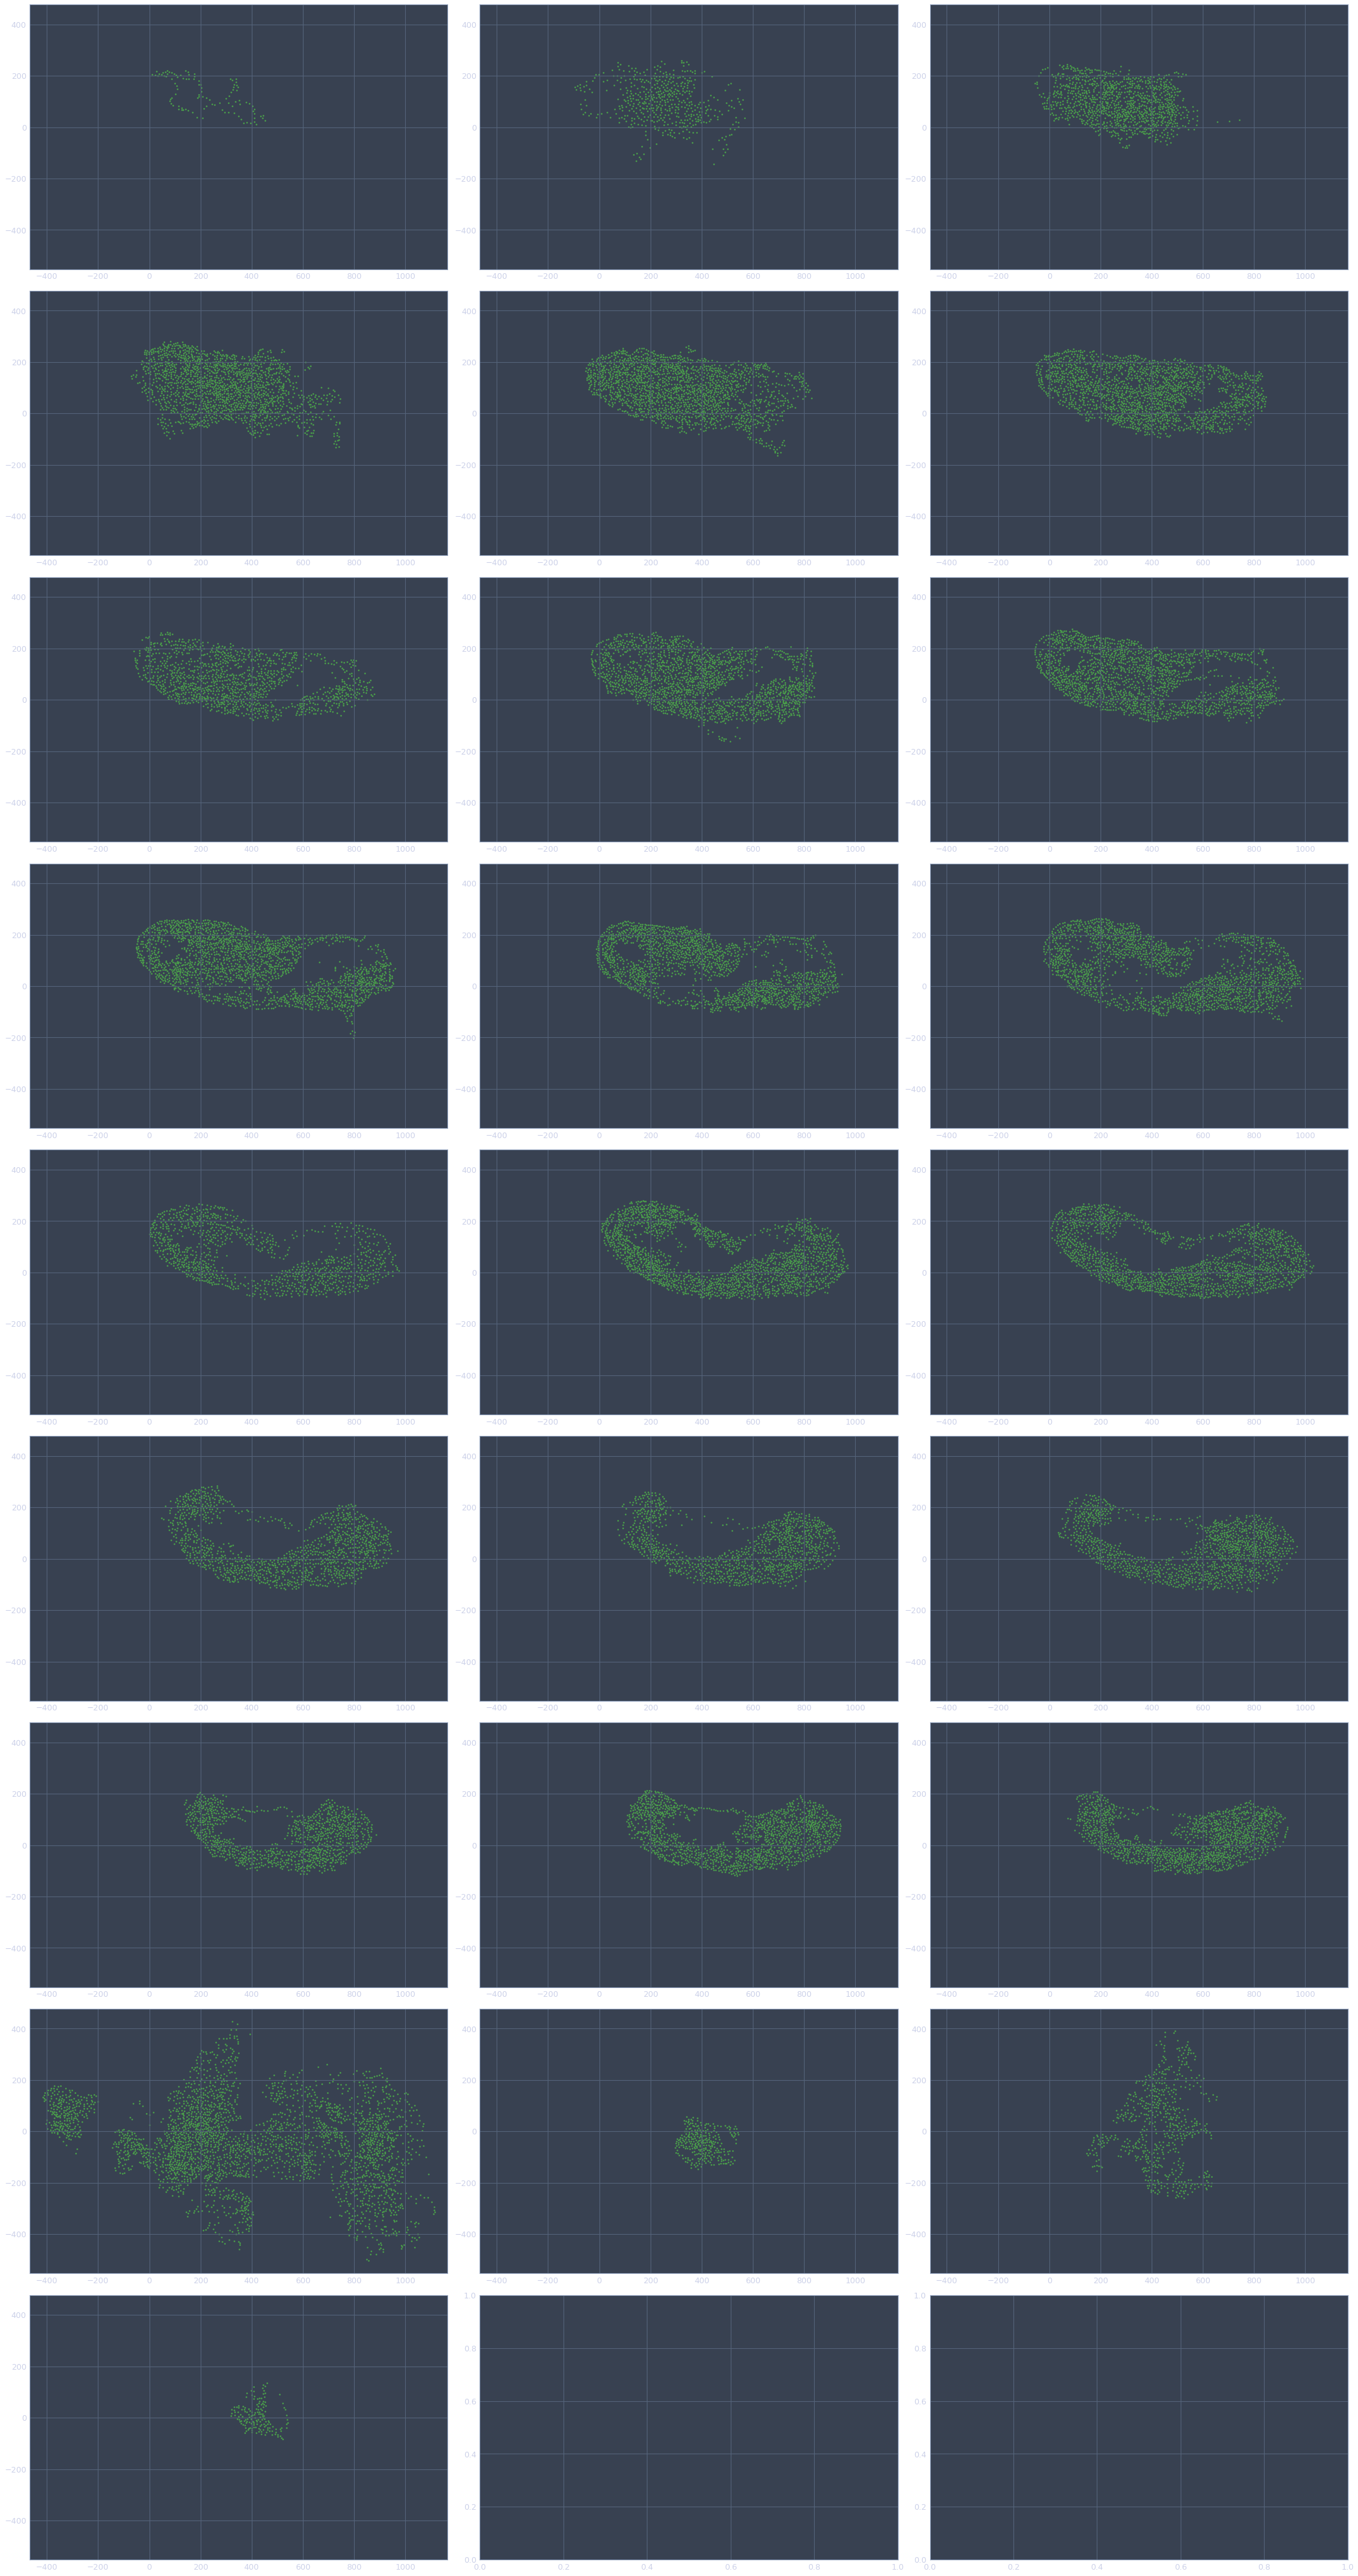

In [12]:
slice_colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3']
xmin,xmax = -100,800
ymin,ymax = -100,300
%matplotlib inline
lines = math.ceil((len(bas_slices)) / 3)
xmin = np.min([np.min(bas_slices[index].obsm['align_spatial'][:,0]) for index in range(len(bas_slices))])
xmax = np.max([np.max(bas_slices[index].obsm['align_spatial'][:,0]) for index in range(len(bas_slices))])
ymin = np.min([np.min(bas_slices[index].obsm['align_spatial'][:,1]) for index in range(len(bas_slices))])
ymax = np.max([np.max(bas_slices[index].obsm['align_spatial'][:,1]) for index in range(len(bas_slices))])
margin = 50
scale=(ymax-ymin+2*margin)/(xmax-xmin+2*margin)

fig, axs = plt.subplots(lines, 3,figsize=(30,lines*10*scale))
for index in range(len(bas_slices)):
    line = index//3
    col = index - line*3
    axs[line,col].scatter(bas_slices[index].obsm['align_spatial'][:,0],bas_slices[index].obsm['align_spatial'][:,1],s=5,c=slice_colors[2])
    axs[line,col].set_xlim([xmin-margin,xmax+margin])
    axs[line,col].set_ylim([ymin-margin,ymax+margin])
    # axs[line,col].axis('equal')
plt.tight_layout()
plt.show()

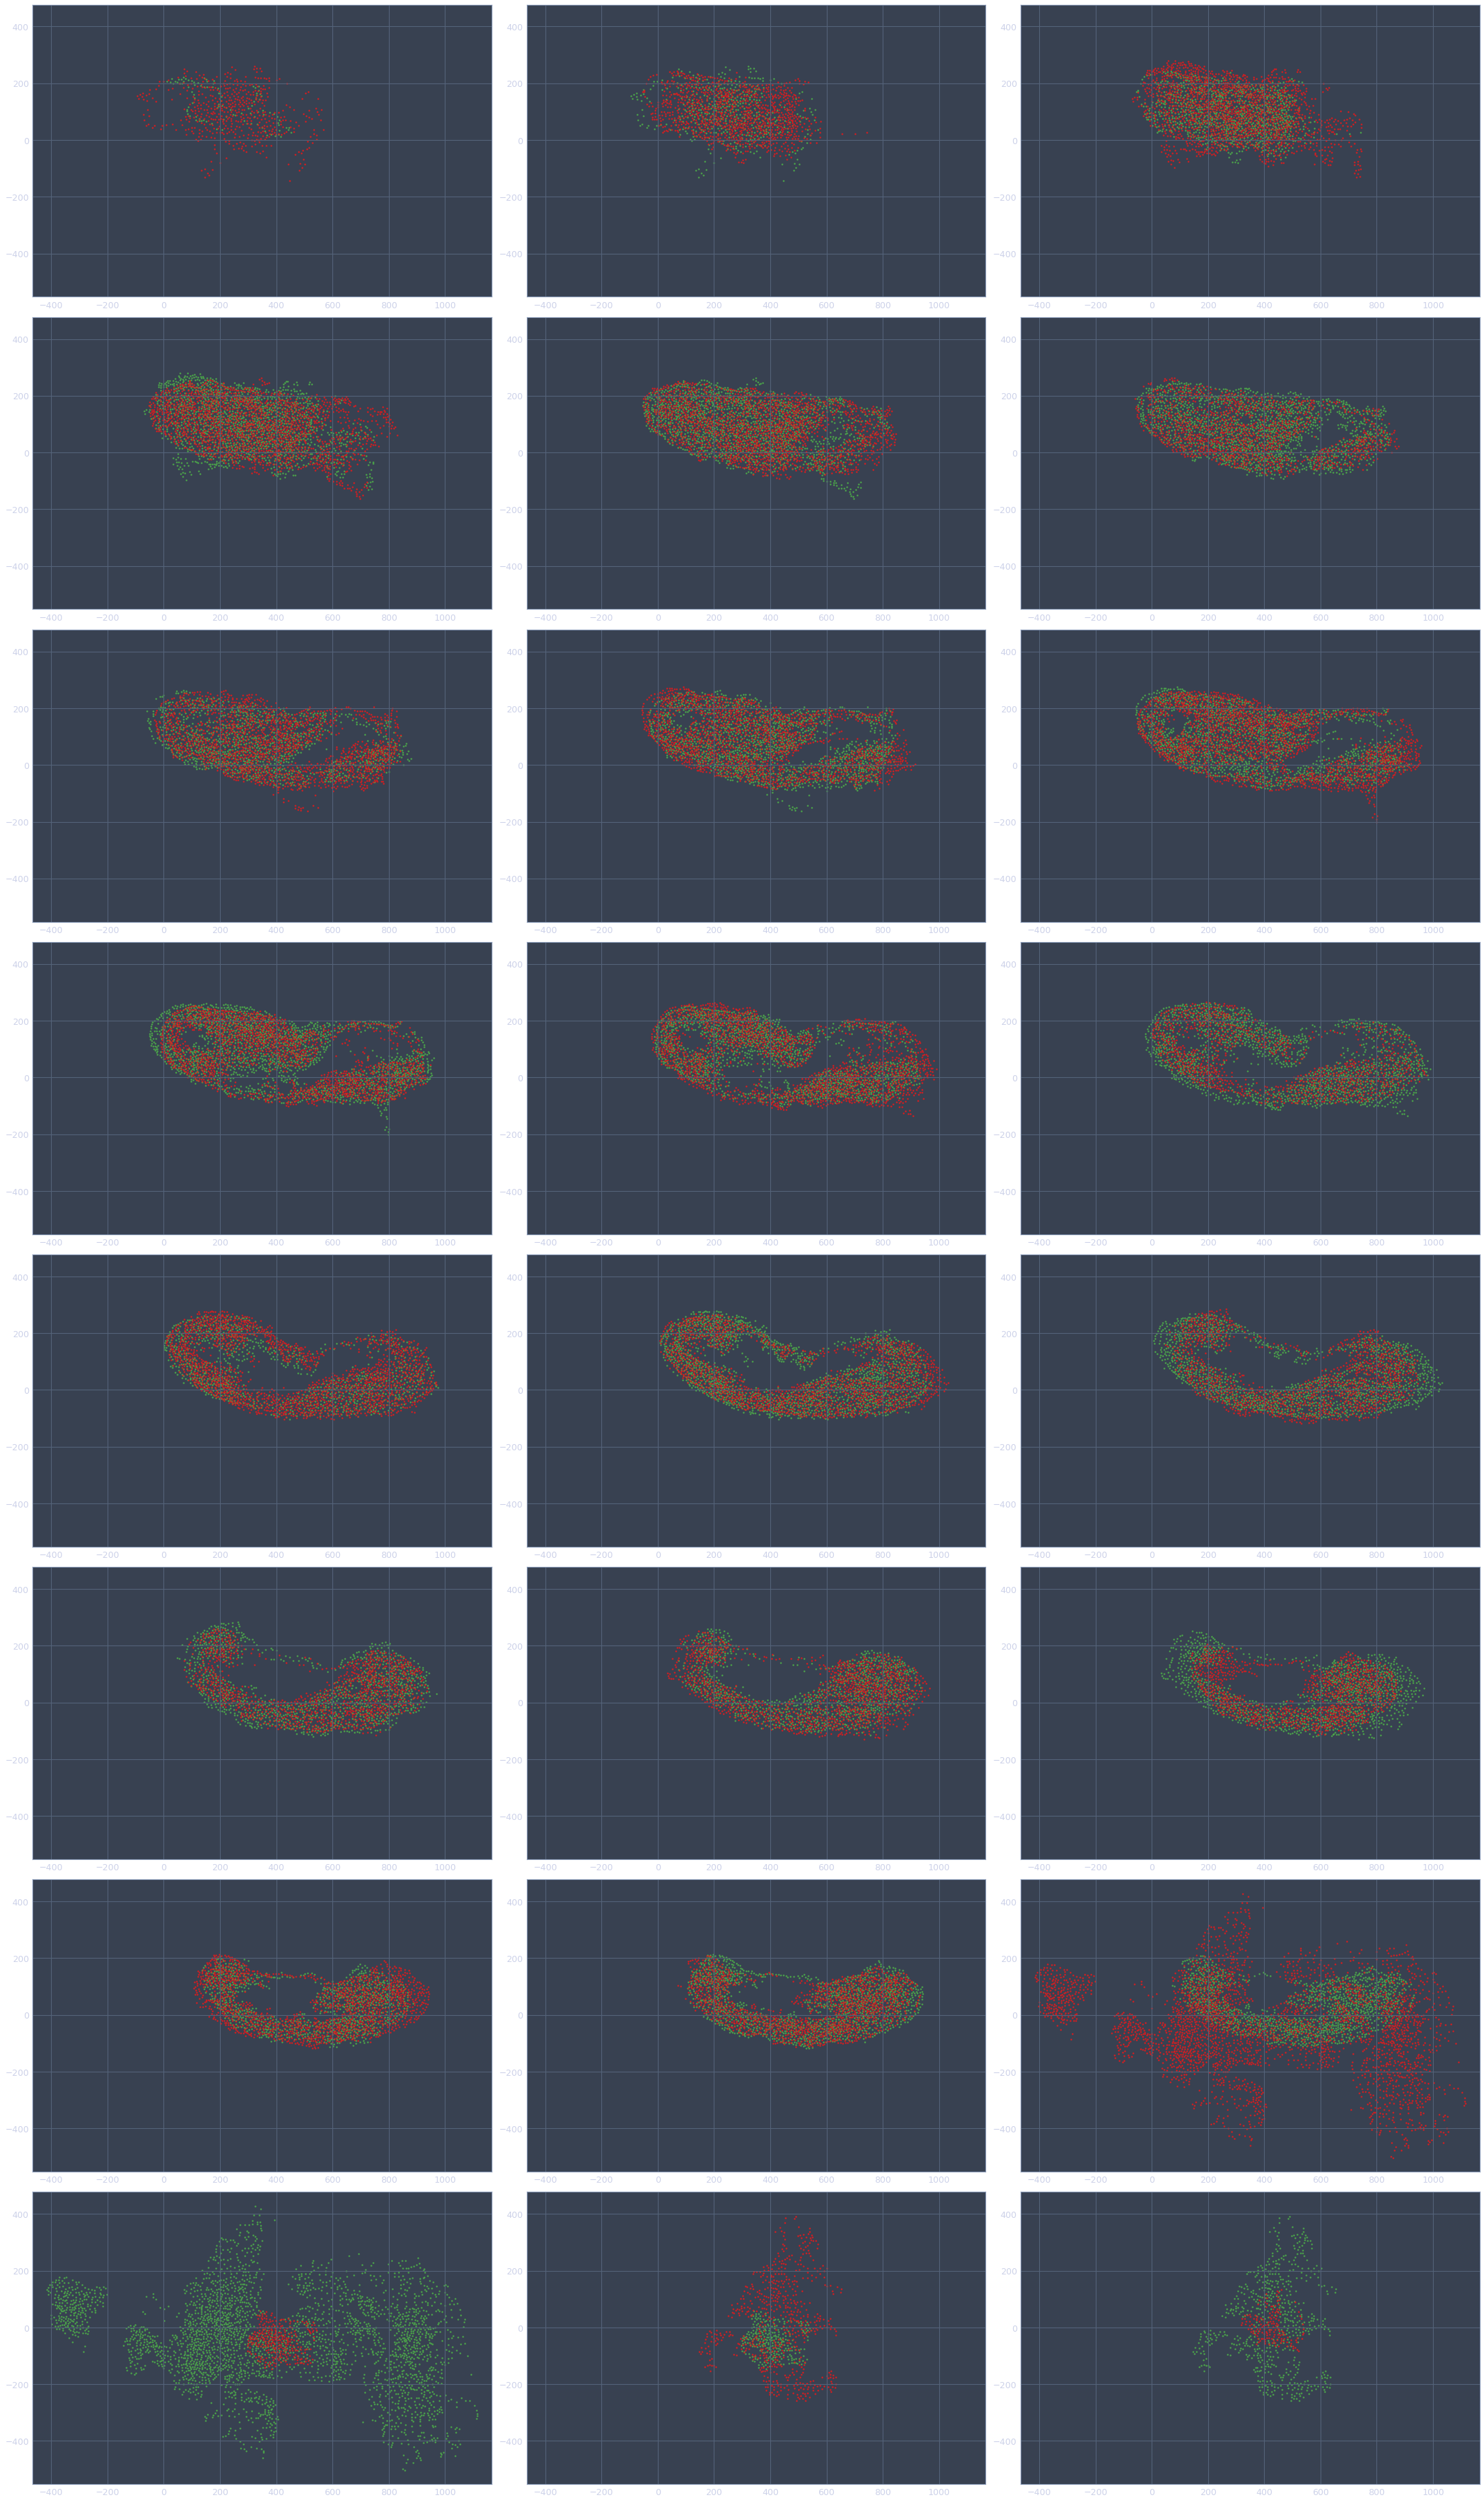

In [13]:
%matplotlib inline
lines = math.ceil((len(bas_slices)-1) / 3)
fig, axs = plt.subplots(lines, 3,figsize=(30,lines*10*scale))
for index in range(len(bas_slices)-1):
    line = index // 3
    col = index - line*3
    axs[line,col].scatter(bas_slices[index].obsm['align_spatial'][:,0],bas_slices[index].obsm['align_spatial'][:,1],s=5,c=slice_colors[2])
    axs[line,col].scatter(bas_slices[index+1].obsm['align_spatial'][:,0],bas_slices[index+1].obsm['align_spatial'][:,1],s=5,c=slice_colors[0])
    axs[line,col].set_xlim([xmin-margin,xmax+margin])
    axs[line,col].set_ylim([ymin-margin,ymax+margin])
plt.tight_layout()
plt.show()

In [21]:
import paste as pst
import os
import ot
os.environ['CUDA_VISIBLE_DEVICES'] = '1'
pis = []
for i in range(len(slices)-1):
    pi = pst.pairwise_align(slices[i], slices[i+1])
    pis.append(pi)
new_slices = pst.stack_slices_pairwise(slices, pis)

Using selected backend cpu. If you want to use gpu, set use_gpu = True.
Using selected backend cpu. If you want to use gpu, set use_gpu = True.
Using selected backend cpu. If you want to use gpu, set use_gpu = True.
Using selected backend cpu. If you want to use gpu, set use_gpu = True.
Using selected backend cpu. If you want to use gpu, set use_gpu = True.
Using selected backend cpu. If you want to use gpu, set use_gpu = True.
Using selected backend cpu. If you want to use gpu, set use_gpu = True.
Using selected backend cpu. If you want to use gpu, set use_gpu = True.
Using selected backend cpu. If you want to use gpu, set use_gpu = True.
Using selected backend cpu. If you want to use gpu, set use_gpu = True.
Using selected backend cpu. If you want to use gpu, set use_gpu = True.
Using selected backend cpu. If you want to use gpu, set use_gpu = True.
Using selected backend cpu. If you want to use gpu, set use_gpu = True.
Using selected backend cpu. If you want to use gpu, set use_gpu 

RESULT MIGHT BE INACURATE
Max number of iteration reached, currently 100000. Sometimes iterations go on in cycle even though the solution has been reached, to check if it's the case here have a look at the minimal reduced cost. If it is very close to machine precision, you might actually have the correct solution, if not try setting the maximum number of iterations a bit higher
/home/timer/anaconda3/envs/lyf_Bio/lib/python3.8/site-packages/POT-0.8.2-py3.8-linux-x86_64.egg/ot/lp/__init__.py:343: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  result_code_string = check_result(result_code)


Using selected backend cpu. If you want to use gpu, set use_gpu = True.
Using selected backend cpu. If you want to use gpu, set use_gpu = True.
Using selected backend cpu. If you want to use gpu, set use_gpu = True.


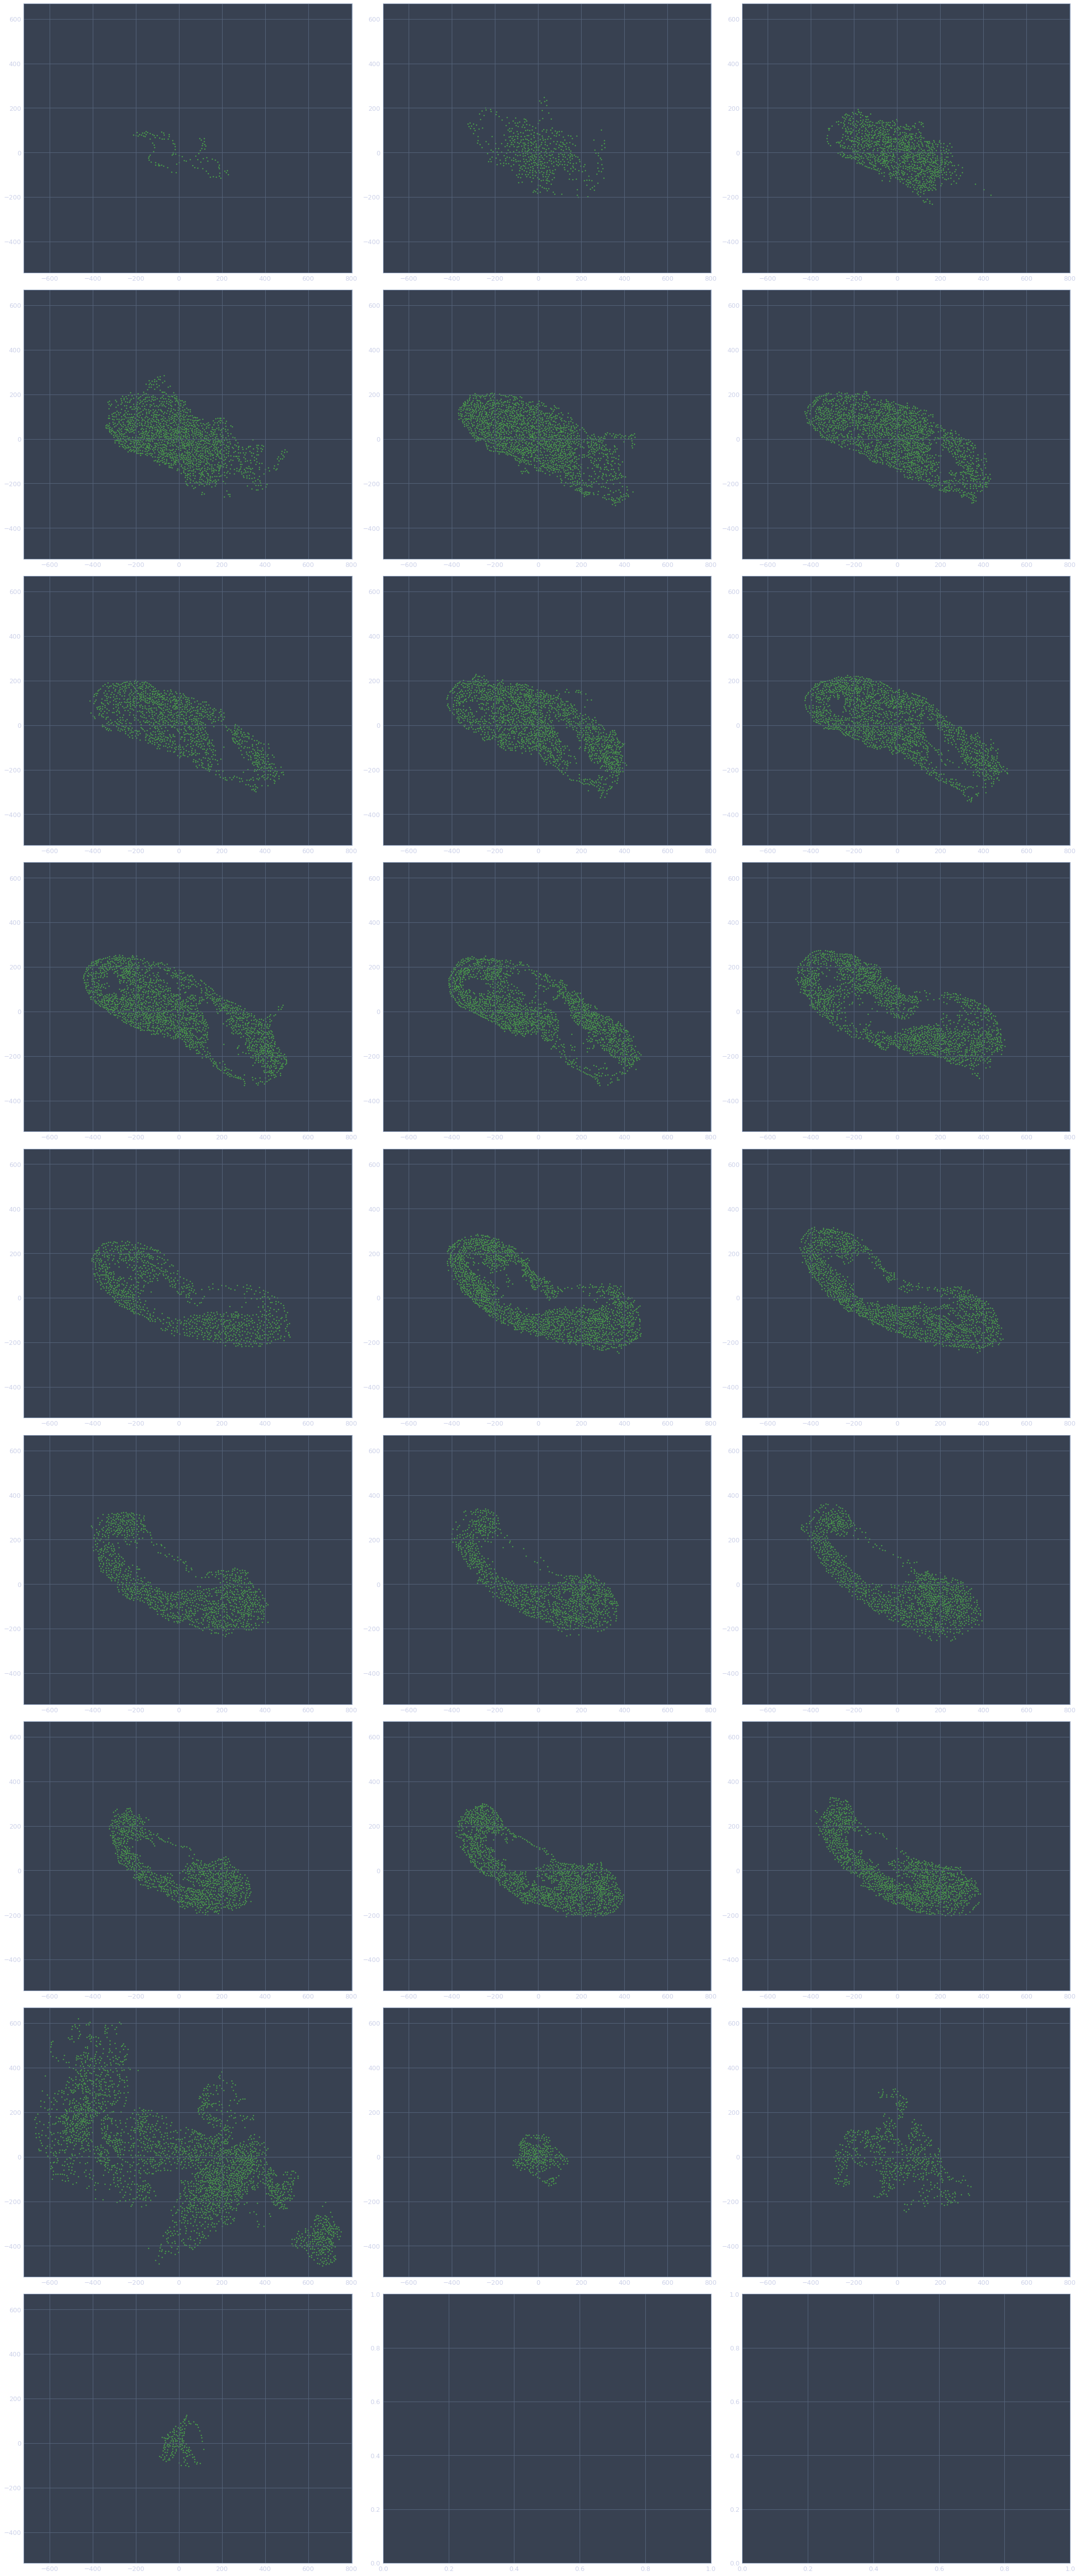

In [22]:
slice_colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3']
xmin = np.min([np.min(new_slices[index].obsm['spatial'][:,0]) for index in range(len(bas_slices))])
xmax = np.max([np.max(new_slices[index].obsm['spatial'][:,0]) for index in range(len(bas_slices))])
ymin = np.min([np.min(new_slices[index].obsm['spatial'][:,1]) for index in range(len(bas_slices))])
ymax = np.max([np.max(new_slices[index].obsm['spatial'][:,1]) for index in range(len(bas_slices))])
margin = 50
scale=(ymax-ymin+2*margin)/(xmax-xmin+2*margin)
%matplotlib inline
lines = math.ceil((len(bas_slices)) / 3)
fig, axs = plt.subplots(lines, 3,figsize=(30,lines*10*scale))
for index in range(len(bas_slices)):
    line = index//3
    col = index - line*3
    axs[line,col].scatter(new_slices[index].obsm['spatial'][:,0],new_slices[index].obsm['spatial'][:,1],s=5,c=slice_colors[2])
    axs[line,col].set_xlim([xmin-margin,xmax+margin])
    axs[line,col].set_ylim([ymin-margin,ymax+margin])
plt.tight_layout()
plt.show()

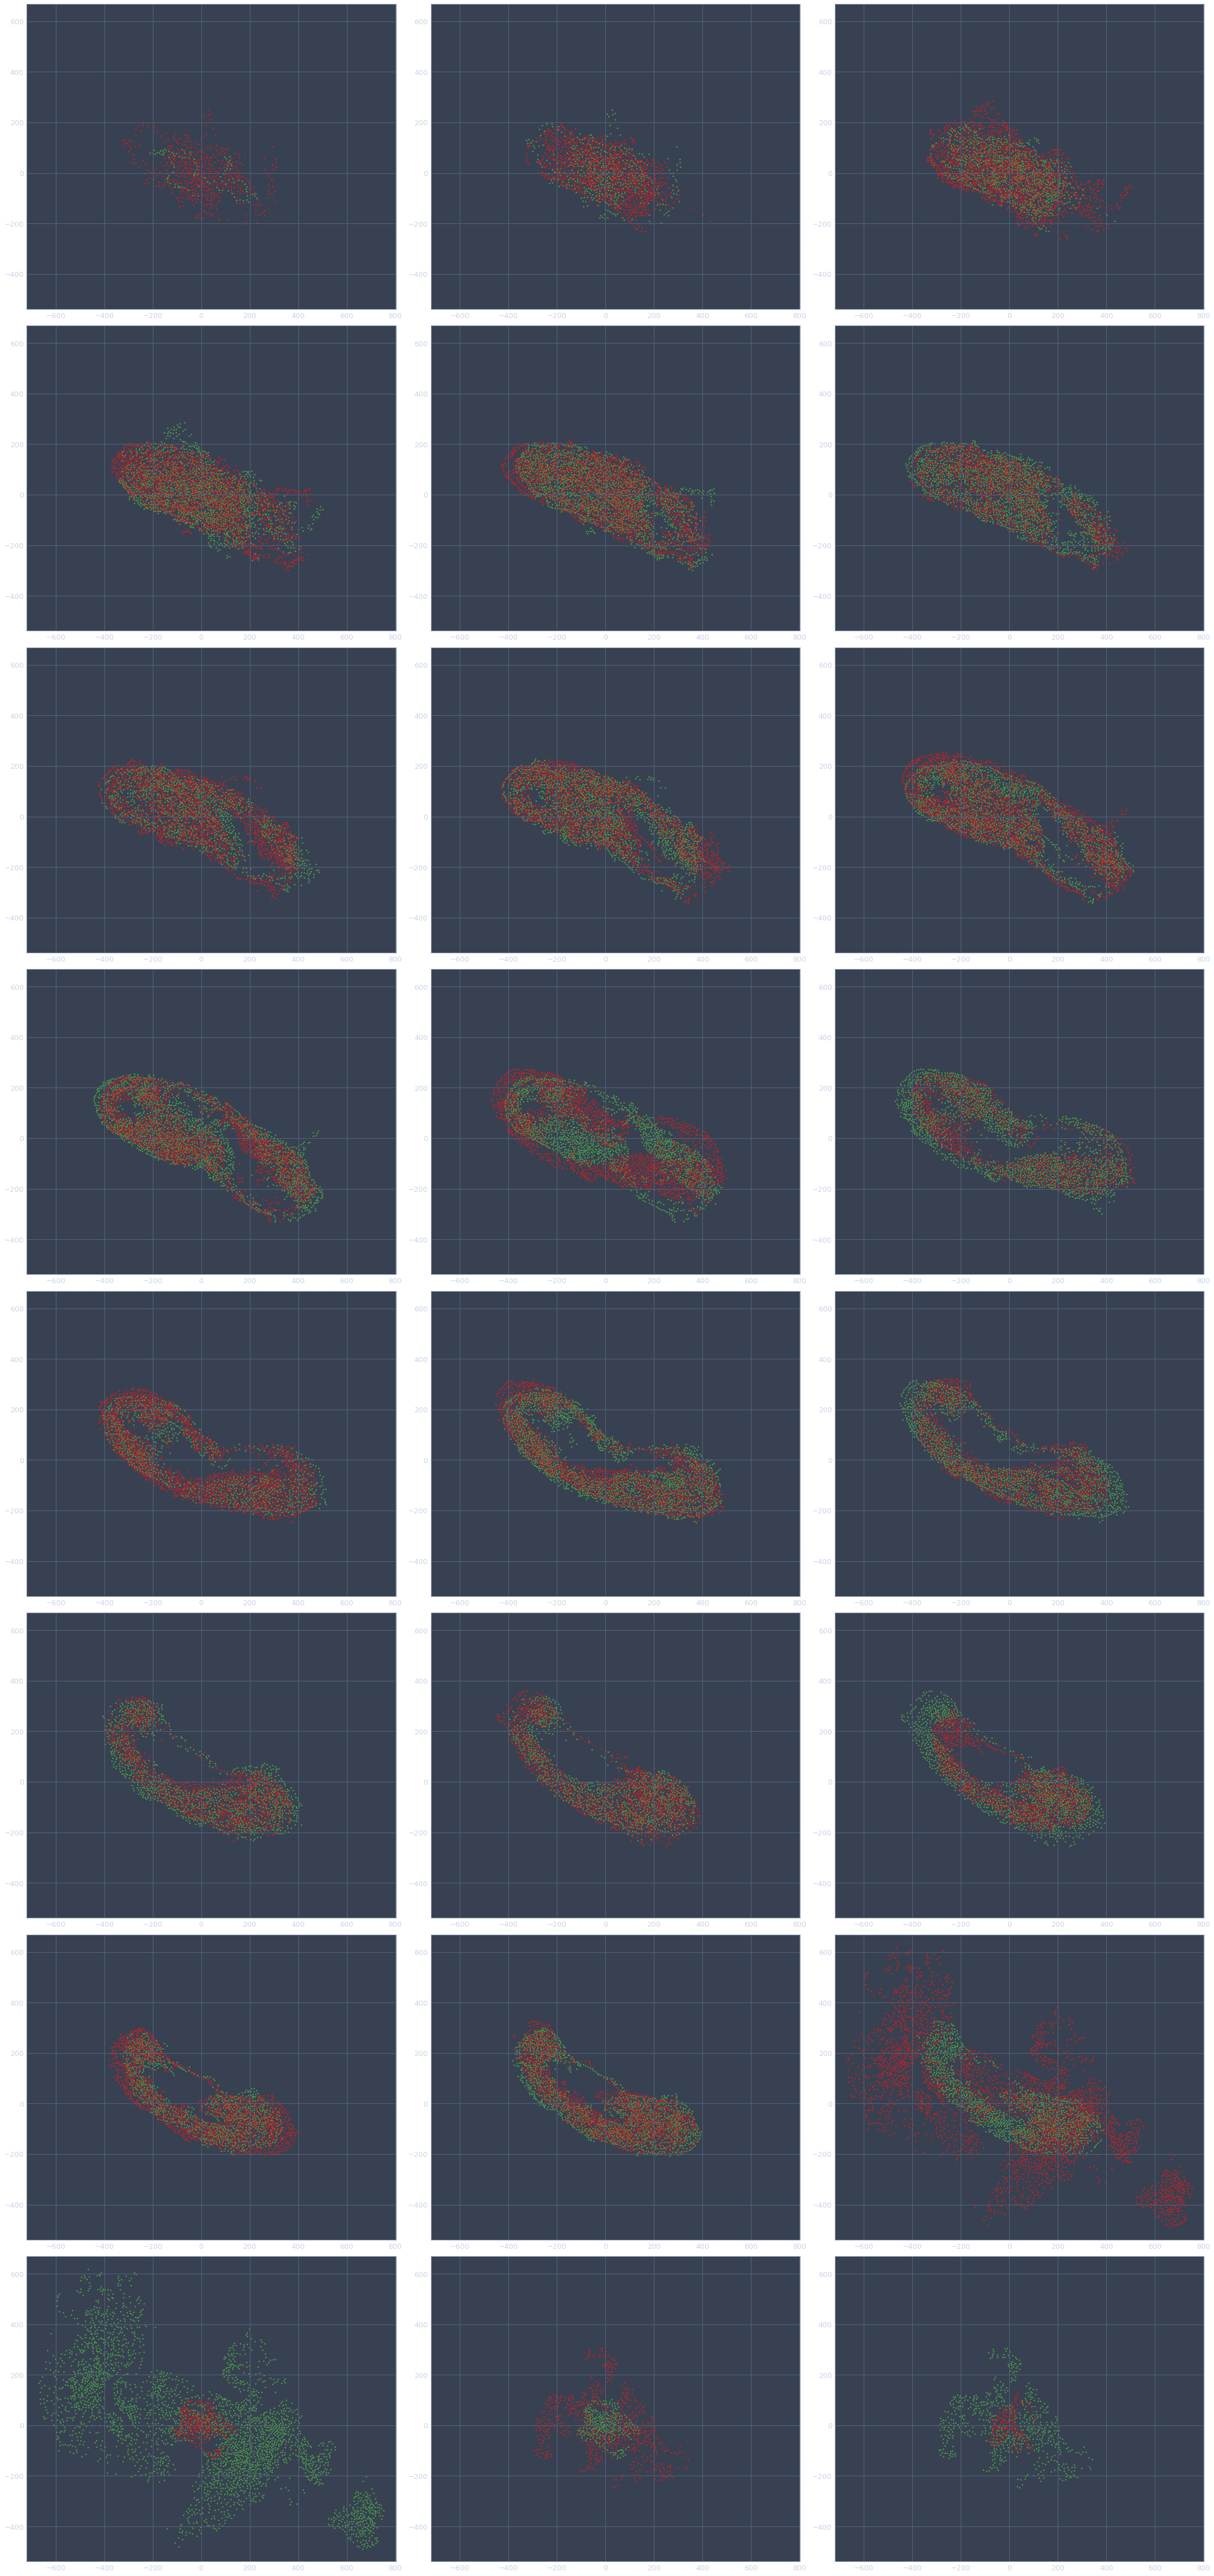

In [23]:
%matplotlib inline
lines = math.ceil((len(bas_slices)-1) / 3)
fig, axs = plt.subplots(lines, 3,figsize=(30,lines*10*scale))
for index in range(len(bas_slices)-1):
    line = index // 3
    col = index - line*3
    axs[line,col].scatter(new_slices[index].obsm['spatial'][:,0],new_slices[index].obsm['spatial'][:,1],s=5,c=slice_colors[2])
    axs[line,col].scatter(new_slices[index+1].obsm['spatial'][:,0],new_slices[index+1].obsm['spatial'][:,1],s=5,c=slice_colors[0])
    axs[line,col].set_xlim([xmin-margin,xmax+margin])
    axs[line,col].set_ylim([ymin-margin,ymax+margin])
plt.tight_layout()
plt.show()